In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json
import os

### Gathering Data

In [55]:
# load WeRateDogs Twitter archive
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [56]:
# load tweet image predictions
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response=requests.get(url)
with open(os.path.join('image-predictions'),mode='wb') as file:
    file.write(response.content)

In [57]:
twitter_image_predictions = pd.read_csv('image-predictions', sep='\t')

In [58]:
# store image prediction dataframe to CSV file
twitter_image_predictions.to_csv('image_predictions.tsv', index=False)

In [59]:
# load retweet count and favorite count
tweet_list=[]
with open('tweet-json.txt','r') as file:
    for row in file:
        json_dict = json.loads(row)
        to_append = {
            'tweet_id':json_dict['id_str'],
            'retweet_count':json_dict['retweet_count'],
            'favorite_count':json_dict['favorite_count']
        }
        tweet_list.append(to_append)
tweet_count = pd.DataFrame(tweet_list, columns=['tweet_id','retweet_count','favorite_count'])

In [60]:
# store retweet and favorite counts dataframe to CSV file
tweet_count.to_csv('tweet_count.csv', index=False)

### Assessing Data

In [61]:
# modify display total column number and column width
pd.options.display.max_columns=100
pd.set_option('max_colwidth',1000)

In [62]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [63]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [64]:
twitter_archive_enhanced.retweeted_status_id.notnull().sum()

181

In [65]:
twitter_archive_enhanced.expanded_urls.isnull().sum()

59

> Only original ratings (no retweets) that have images should be left. Retweets and tweets without images should be deleted. Three columns about retweet status should be deleted

In [66]:
twitter_archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

> several rating denominators are not 10

In [67]:
twitter_archive_enhanced.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Lola          10
Penny         10
Tucker        10
Winston        9
Bo             9
Sadie          8
the            8
Bailey         7
an             7
Daisy          7
Buddy          7
Toby           7
Koda           6
Jack           6
Milo           6
Bella          6
Rusty          6
Leo            6
Oscar          6
Dave           6
Jax            6
Stanley        6
Scout          6
Bentley        5
            ... 
Timmy          1
Deacon         1
Bloo           1
Marvin         1
Stormy         1
Traviss        1
Lance          1
Hanz           1
Bobble         1
Timofy         1
Robin          1
Clyde          1
Jomathan       1
Tilly          1
Edd            1
Kevon          1
Meatball       1
BeBe           1
Willem         1
Spanky         1
Dot            1
Sweets         1
Kial           1
Buckley        1
Stephanus      1
Carll          1
Cermet         1
Anthony       

> Dog names include 'a', 'an', 'the', etc. Obviously, there are quality issues of those names.

In [68]:
dog_stages = twitter_archive_enhanced[['doggo','pupper','puppo','floofer']]
dog_stages.replace('None',np.nan).notnull().sum(axis=1).value_counts()

0    1976
1     366
2      14
dtype: int64

> Most dogs have not stage data and some dogs have two stages

In [69]:
sum(twitter_archive_enhanced.tweet_id.duplicated())

0

> No duplication observed

In [70]:
twitter_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [71]:
twitter_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [72]:
twitter_image_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [73]:
sum(twitter_image_predictions.jpg_url.duplicated())

66

> 66 pictures were duplicately used for image predictions

In [74]:
tweet_count.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [75]:
tweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [76]:
sum(tweet_count.tweet_id.duplicated())

0

#### Assessing Data Summary

> After assessing data visually and programmatically for quality and tidiness, here is the summary.

 #### Quality Issues
>
> ##### `twitter_archive_enhanced`table
> - 1. Column 'tweet_id' data type is int64, should be corrected to string
> - 2. Too much missing data in Column 'in_reply_to_status_id' and column 'in_reply_to_user_id', should be deleted
> - 3. Retweets and tweets without images should be deleted. Three columns about retweet status should be deleted
> - 4. Some rating denominators are not 10 and some numerators are abnormal large numbers. Rating data should be re-extracted from 'text' column
> - 5. Column 'name' has missing data and mistake names such as, 'a', 'an', 'the', etc. All names with problems initialed with lowercase letter. Those problem names would be set as NaN.
> - 6. Most dog stage data are missing and some dogs have two stages. Dog stage data should be re-extracted from 'text' column
>
> ##### `twitter_image_predictions`table
> - 7. Duplications in column 'jpg_url', which should be deleted
> - 8. Data type of column 'tweet_id' is int64, should be corrected to string
> 
> ##### `tweet_count`table
> - No issue
>
>  
 #### Tidiness Issues
> - 9. In 'twitter_archive_enhanced' table, variables as doggo, floofer, pupper,and puppo are values of one variable. They should be included in variable 'dog_stage'
> - 10. All three tables could be merged on 'tweet_id' for analysis, as all variables belong to one observational unit - dog rating 



### Cleaning Data

In [77]:
# Copies of the original pieces of data are made prior to cleaning
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
twitter_image_predictions_clean = twitter_image_predictions.copy()
tweet_count_clean = tweet_count.copy()

- 1. Column 'tweet_id' data type is int64, should be corrected to string

In [78]:
twitter_archive_enhanced_clean.tweet_id = twitter_archive_enhanced_clean.tweet_id.astype(str)

- 2. Too much missing data in Column 'in_reply_to_status_id' and column 'in_reply_to_user_id', should be deleted

In [79]:
twitter_archive_enhanced_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id'], inplace=True)

- 3. Retweets and tweets without images should be deleted. Three columns about retweet status should be deleted

In [80]:
# Retweets and tweets without images should be deleted
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.retweeted_status_id.isnull()]
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.expanded_urls.notnull()]

In [81]:
# Three columns about retweet status should be deleted
twitter_archive_enhanced_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], inplace=True)

- 4. Some rating denominators are not 10 and some numerators are abnormal large numbers. Rating data should be re-extracted from 'text' column

In [82]:
# Extract rating from 'text' column in twitter_archive_enhanced_clean table
correct_rating = twitter_archive_enhanced_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
correct_rating.columns = ['rating_numerator','rating_denominator']
twitter_archive_enhanced_clean['rating_numerator'] = correct_rating.rating_numerator.astype(float) # keep float numbers in numerators as they in text
twitter_archive_enhanced_clean['rating_denominator'] = correct_rating.rating_denominator.astype(int)

In [83]:
# Rows with multiple ratings, not big portion of data. For simplicity, we set NaN for their rating_denominator and rating_numerator.
# In the future work, we could read and analyze text contents of those rows to identify their real ratings. 
twitter_archive_enhanced_clean['rating'] = twitter_archive_enhanced_clean.text.str.findall('((?:\d+\.)?\d+\/\d+)')
sum(twitter_archive_enhanced_clean['rating'].str.len()>1)

27

In [84]:
# Set NaN on rating_denominator and rating_numerator columns for those with multiple ratings
twitter_archive_enhanced_clean.loc[(twitter_archive_enhanced_clean['rating'].str.len()>1),'rating_denominator']=np.nan
twitter_archive_enhanced_clean.loc[(twitter_archive_enhanced_clean['rating'].str.len()>1),'rating_numerator']=np.nan

In [85]:
# Count rows with rating denominator is not 10
sum(~(twitter_archive_enhanced_clean.rating_denominator==10))

40

In [86]:
# Set NaN on rating_denominator and rating_numerator columns for those with denominator not 10
twitter_archive_enhanced_clean.loc[(~(twitter_archive_enhanced_clean.rating_denominator==10)),'rating_denominator']=np.nan
twitter_archive_enhanced_clean.loc[(~(twitter_archive_enhanced_clean.rating_denominator==10)),'rating_numerator']=np.nan

In [87]:
sum(twitter_archive_enhanced_clean.rating_numerator>30)

2

In [88]:
# Set NaN on rating_denominator and rating_numerator columns for those with abnormal rating_numerator>30
twitter_archive_enhanced_clean.loc[(twitter_archive_enhanced_clean.rating_numerator>30),'rating_denominator']=np.nan
twitter_archive_enhanced_clean.loc[(twitter_archive_enhanced_clean.rating_numerator>30),'rating_numerator']=np.nan

- 5. Column 'name' has missing data and mistake name such as, 'a', 'an', 'the', etc. All names with problems initialed with lowercase letters. Those problem name would be set as NaN

In [89]:
# replace names with problem by NaN
mask = twitter_archive_enhanced_clean.name.str.islower()
column_name = 'name'
twitter_archive_enhanced_clean.loc[mask, column_name] = np.nan
# replace 'None' by NaN
twitter_archive_enhanced_clean.name.replace('None',np.nan, inplace=True)

- 6. Most dog stage data are missing and 14 dogs have two stages. Dog stage data should be re-extracted from 'text' column

In [90]:
# re-extract dog stage from 'text' column
twitter_archive_enhanced_clean['dog_stage'] = twitter_archive_enhanced_clean.text.str.lower().str.findall('doggo|pupper|puppo|floof')
twitter_archive_enhanced_clean['dog_stage'] = twitter_archive_enhanced_clean['dog_stage'].apply(lambda x: ','.join(set(x)))

In [91]:
twitter_archive_enhanced_clean.dog_stage.replace('',np.nan,inplace=True)

In [92]:
# Set NaN on dog_stage for those with multiple dog stages
twitter_archive_enhanced_clean.loc[(twitter_archive_enhanced_clean.dog_stage.str.len()>6),'dog_stage']=np.nan

In [93]:
twitter_archive_enhanced_clean.dog_stage.value_counts()

pupper    247
doggo      78
floof      36
puppo      28
Name: dog_stage, dtype: int64

- 7. Duplications in column 'jpg_url', which should be deleted

In [94]:
twitter_image_predictions_clean.jpg_url.drop_duplicates(inplace=True)

- 8. Data type of column 'tweet_id' is int64, should be corrected to string

In [95]:
twitter_image_predictions_clean.tweet_id = twitter_image_predictions_clean.tweet_id.astype(str)

- 9. In 'twitter_archive_enhanced' table, variables as doggo, floofer, pupper,and puppo are values of one variable. They have been included in variable 'dog_stage' in item 6. Here, the four columns of doggo, floofer, pupper,and puppo will be deleted.

In [96]:
twitter_archive_enhanced_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

- 10. All three tables will be merged on 'tweet_id' for analysis, as all variables belong to one observational unit - dog rating

In [97]:
df_clean = twitter_archive_enhanced_clean.merge(twitter_image_predictions_clean, how='inner', on='tweet_id').merge(tweet_count_clean,how='inner',on='tweet_id')

In [98]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 23 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1952 non-null float64
rating_denominator    1952 non-null float64
name                  1350 non-null object
rating                1994 non-null object
dog_stage             355 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-nul

In [99]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,[13/10],NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,[13/10],NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,[12/10],NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,[13/10],NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,[12/10],NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


### Store Cleaned DataFrame

In [100]:
df_clean.to_csv('twitter_archive_master.csv', index=False)

### Data Analysis

In [101]:
# load data from saved CSV file
df = pd.read_csv('twitter_archive_master.csv')

In [102]:
# check dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 23 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1952 non-null float64
rating_denominator    1952 non-null float64
name                  1350 non-null object
rating                1994 non-null object
dog_stage             355 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null

#### Data Study Questions
> 1. What is the most popular name(s) for dogs?
> 2. Which stage of dogs has the highest rating?
> 3. What breeds of dogs do people like most?
> 4. What is the relation between rating and favorite counts?


- 1. What is the most popular name(s) for dogs?

In [103]:
df.name.nunique()

913

In [104]:
df.name.value_counts().head(10)

Charlie    11
Cooper     10
Oliver     10
Lucy       10
Tucker      9
Penny       9
Winston     8
Sadie       8
Toby        7
Lola        7
Name: name, dtype: int64

> Among 913 names, we could see 'Charlie', 'Cooper', 'Oliver', 'Lucy', 'Penny', and 'Tucker' are most used names.

- 2. Which stage of dogs has the highest rating?

In [105]:
df.dog_stage.notnull().sum()

355

In [106]:
df.groupby('dog_stage').rating_numerator.mean().sort_values(ascending=False)

dog_stage
puppo     12.111111
doggo     11.863636
floof     11.696970
pupper    10.603349
Name: rating_numerator, dtype: float64

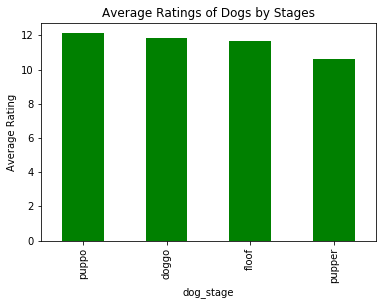

In [107]:
df.groupby('dog_stage').rating_numerator.mean().sort_values(ascending=False).plot(kind='bar', color='g')
plt.ylabel('Average Rating')
plt.title('Average Ratings of Dogs by Stages');

> From data of 355 dogs, we found the average rating of dog stage from high to low is puppo, doggo, floof, and pupper. 

- 3. What breeds of dogs do people like most?

In [108]:
# identity dog breed
breed=[]
for i in df.index:
    if df.p1_dog.loc[i]==True:
        breed.append(df.p1.loc[i])
    elif df.p2_dog.loc[i]==True:
        breed.append(df.p2.loc[i])
    elif df.p3_dog.loc[i]==True:
        breed.append(df.p3.loc[i])
    else:
        breed.append(np.nan)
        
df['dog_breed']=breed

In [109]:
#  find favorite counts of top 10 dog breeds
breed_rank = df.groupby('dog_breed').favorite_count.sum().sort_values(ascending=False).head(10)

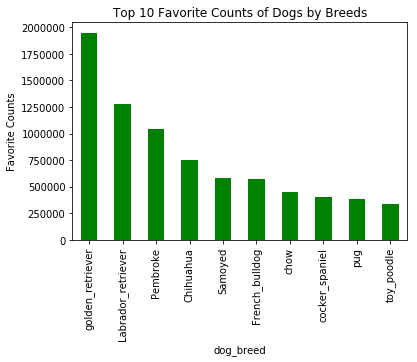

In [110]:
breed_rank.plot(kind='bar',color='g')
plt.ylabel('Favorite Counts')
plt.title('Top 10 Favorite Counts of Dogs by Breeds');

> By ranking favorite counts of variety breeds of dogs, we found the top 10 popular dog breeds shown as figure above.

- 4. What is the relation between rating and favorite counts?

In [111]:
# eliminate null values 
rating_favorite = df[['rating_numerator','favorite_count']]
rating_favorite = rating_favorite[rating_favorite.rating_numerator.notnull()]

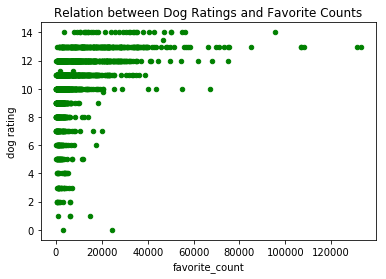

In [112]:
rating_favorite.plot(x='favorite_count', y='rating_numerator', kind='scatter', color='g')
plt.title('Relation between Dog Ratings and Favorite Counts')
plt.ylabel('dog rating');

> By scatter plot, we investigated the relation between dog rating and favorite counts. We found that the popularity of dogs is positive correlated to the favorite counts of dogs.